# Objective:

The objective of this project is to create a machine learning model which will predict whether a patient has diabetes or not based on the diagonostic measurements included in the dataset.

Dataset url : https://www.kaggle.com/uciml/pima-indians-diabetes-database

# Importing the Dependencies

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# Data Collection and Analysis

In [4]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('diabetes.csv')

In [5]:
# printing the first 5 rows  of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# number of rows and columns
diabetes_dataset.shape

(768, 9)

In [7]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# data-type of features
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
# checking for null values
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
# checking for duplicate values
diabetes_dataset[diabetes_dataset.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [7]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 => non-diabetic

1 => diabetic

In [8]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


# Data Visualization

### Outcome countplot

<Axes: xlabel='Outcome', ylabel='count'>

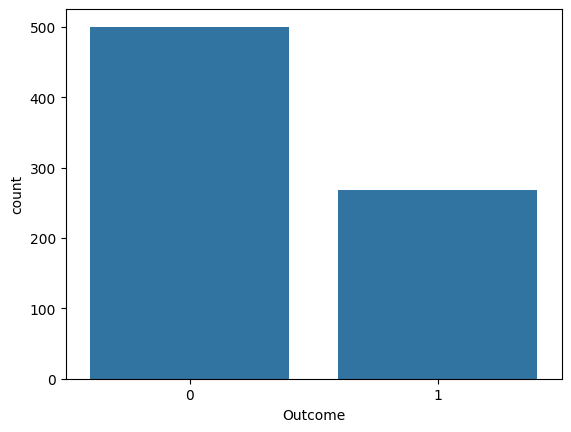

In [14]:
sns.countplot(x='Outcome',data=diabetes_dataset)

### Histogram for each feature

In [54]:
df = diabetes_dataset.drop(columns='Outcome',axis=1)

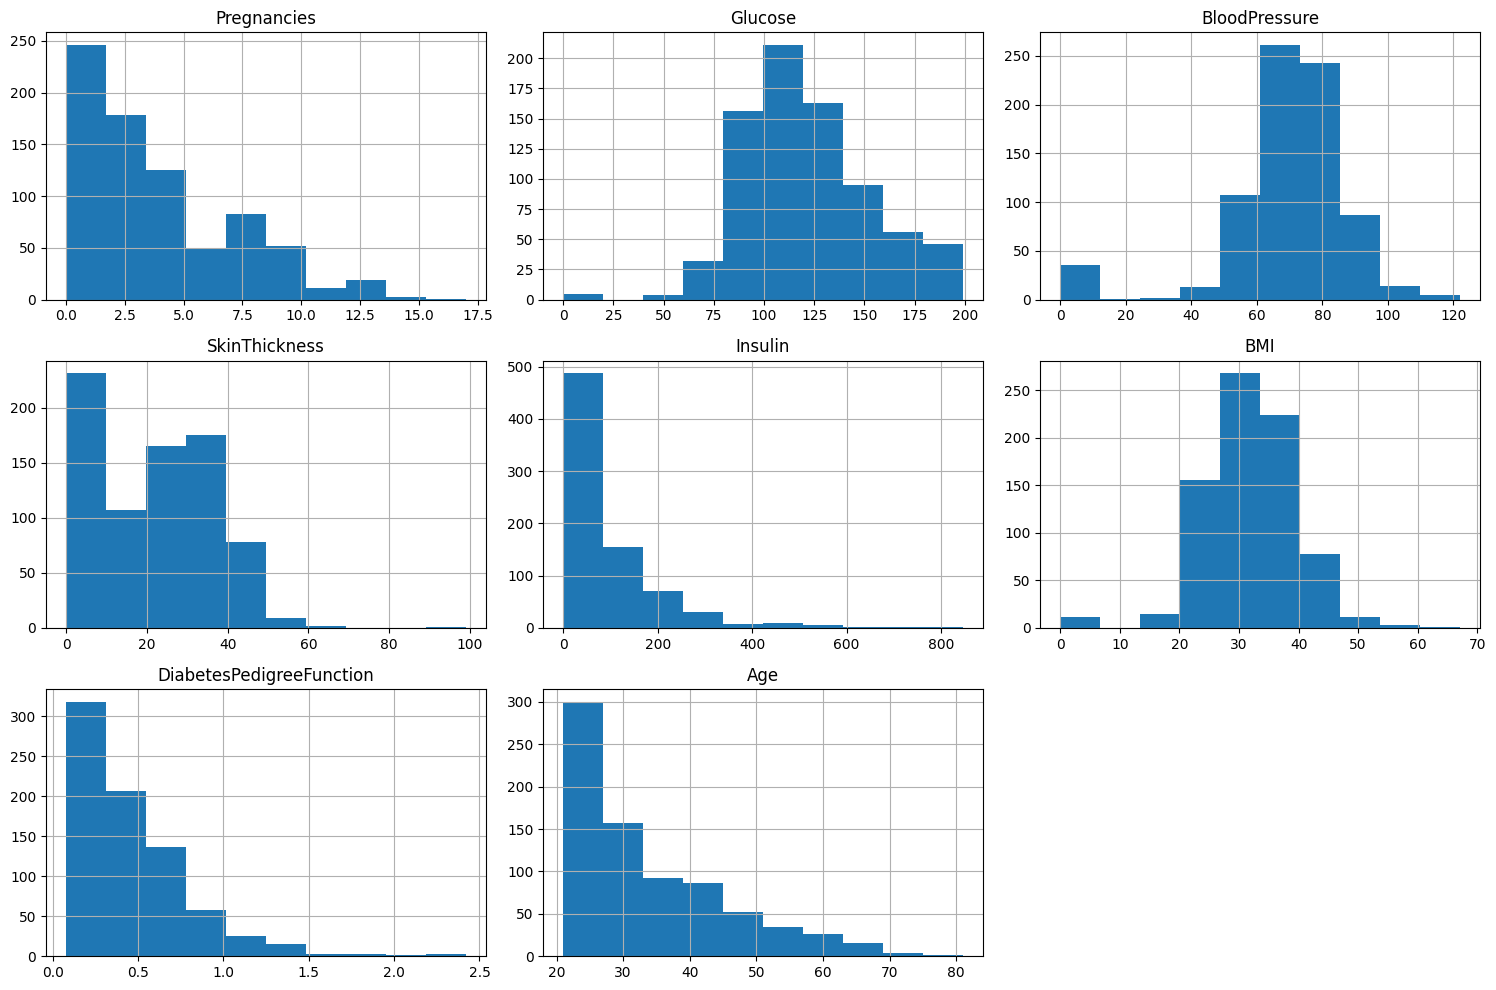

In [55]:
df.hist(bins=10, figsize=(15,10))
plt.tight_layout()
plt.show()

### Scatter Plot

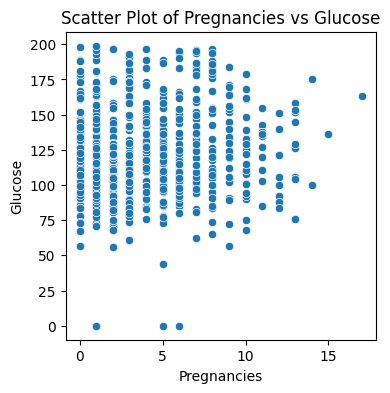

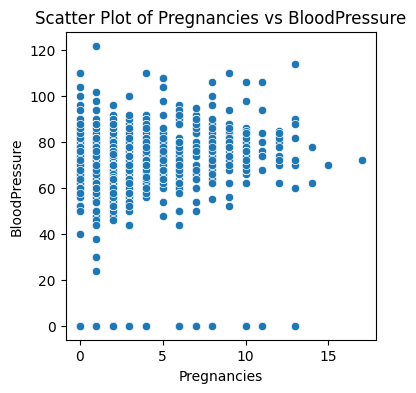

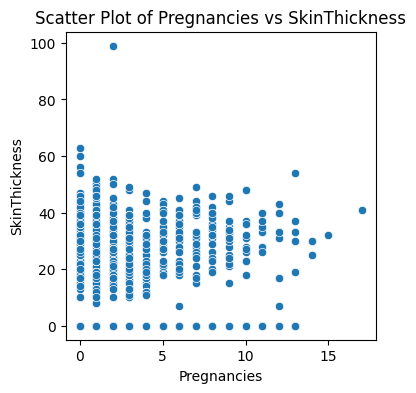

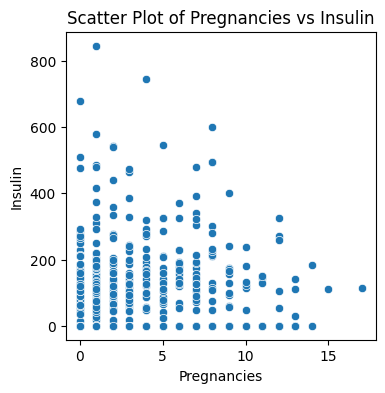

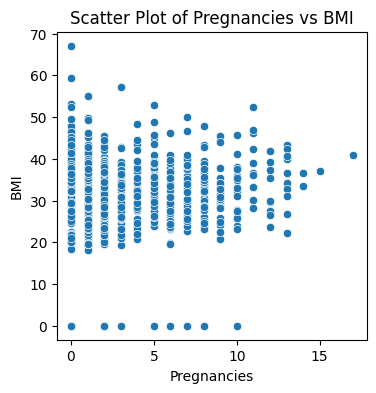

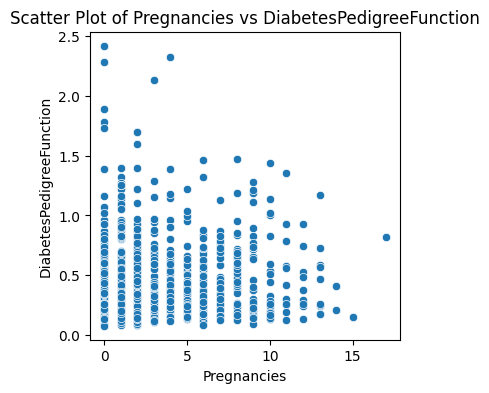

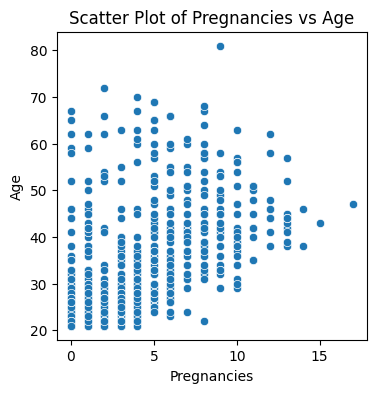

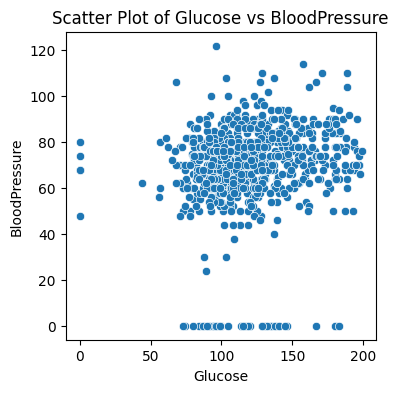

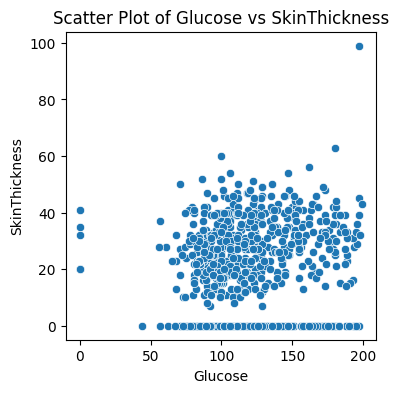

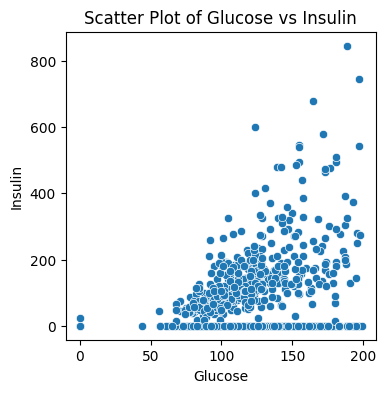

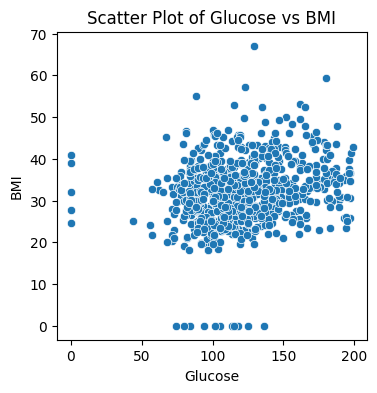

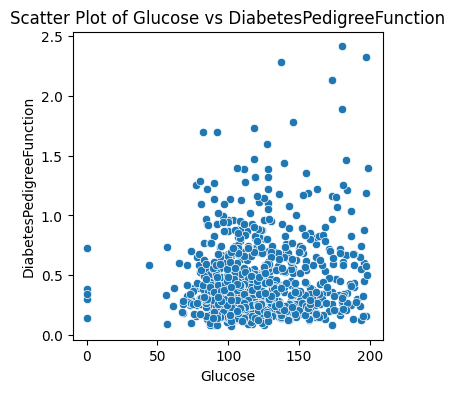

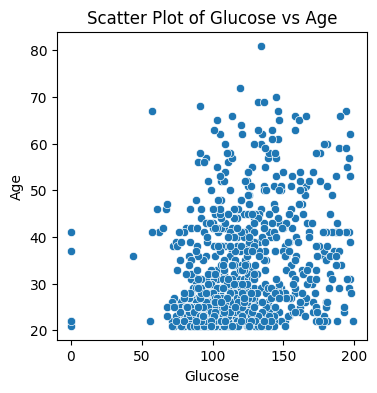

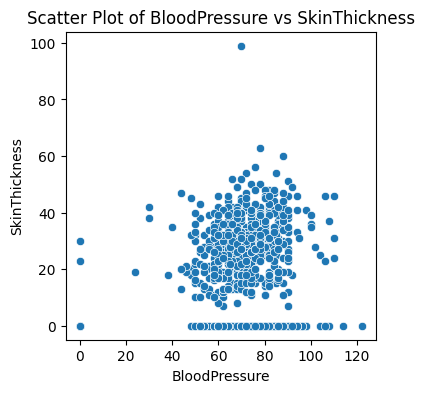

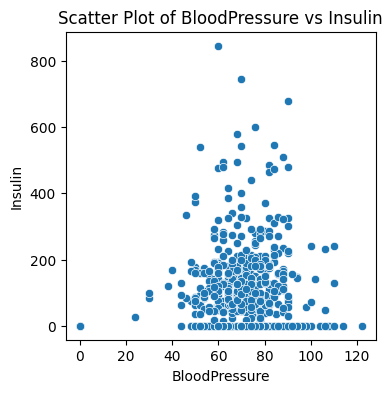

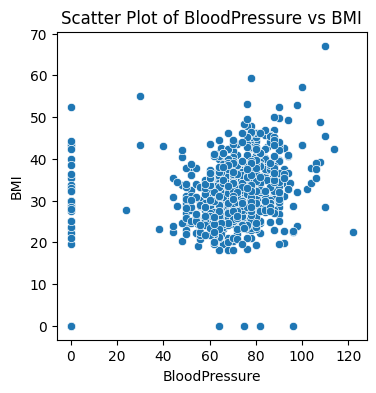

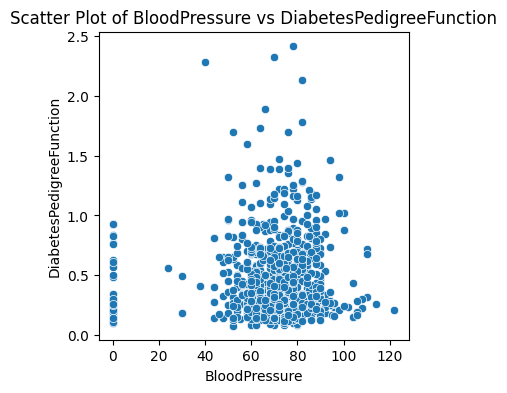

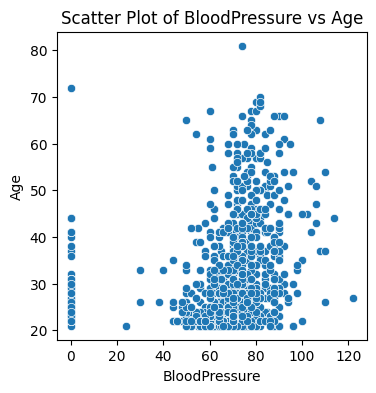

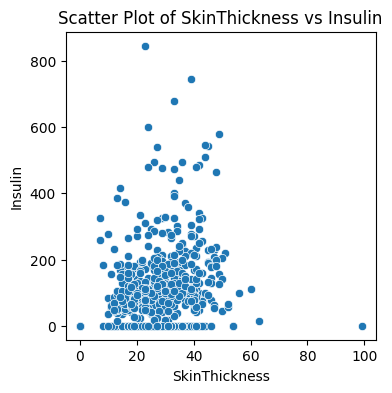

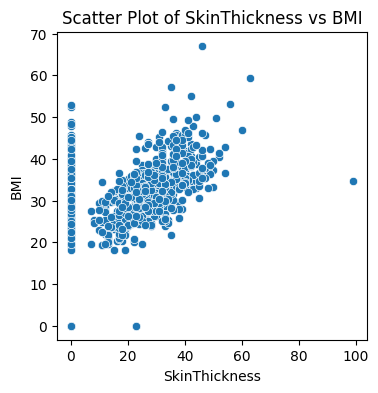

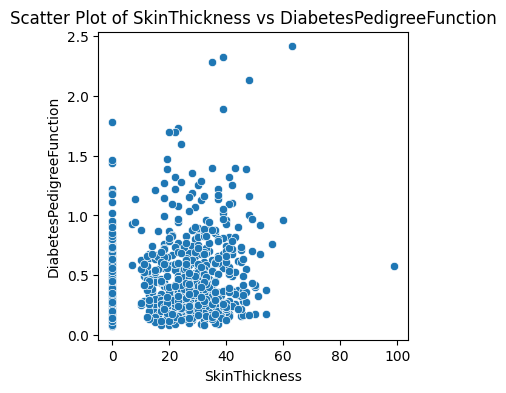

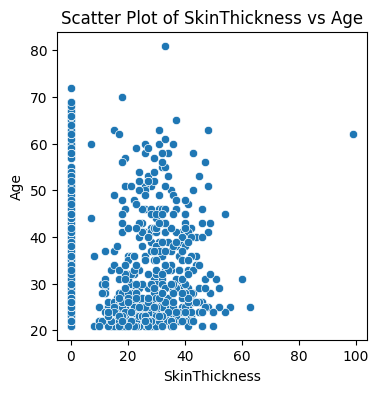

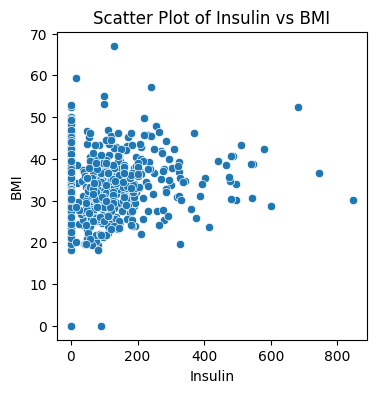

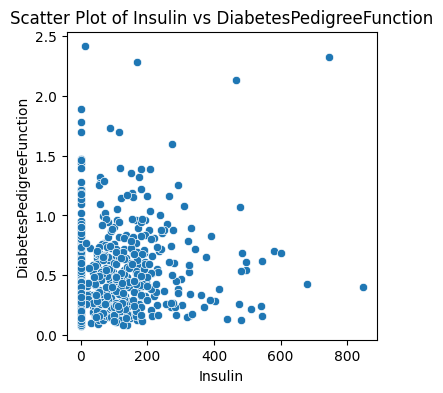

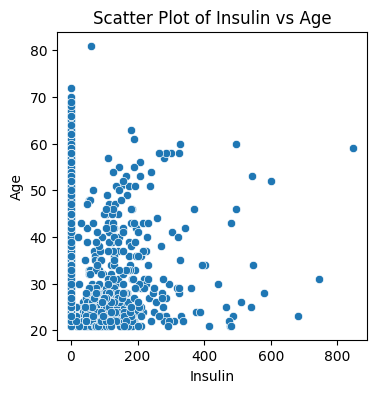

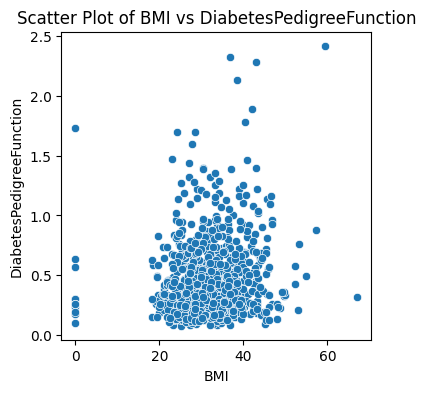

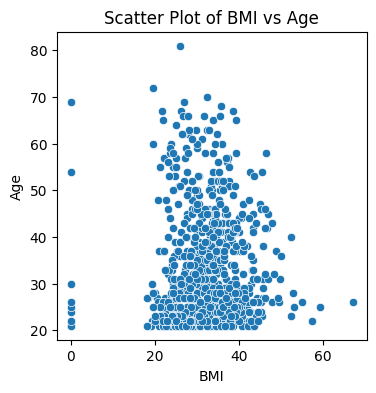

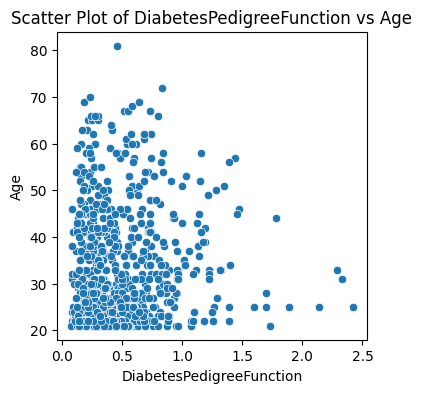

In [58]:
columns = df.columns

for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        plt.figure(figsize=(4,4))
        sns.scatterplot(x=df[columns[i]],y=df[columns[j]])
        plt.title(f'Scatter Plot of {columns[i]} vs {columns[j]}')
        plt.xlabel(f'{columns[i]}')
        plt.ylabel(f'{columns[j]}')
        plt.show()
    

### Pair Plot

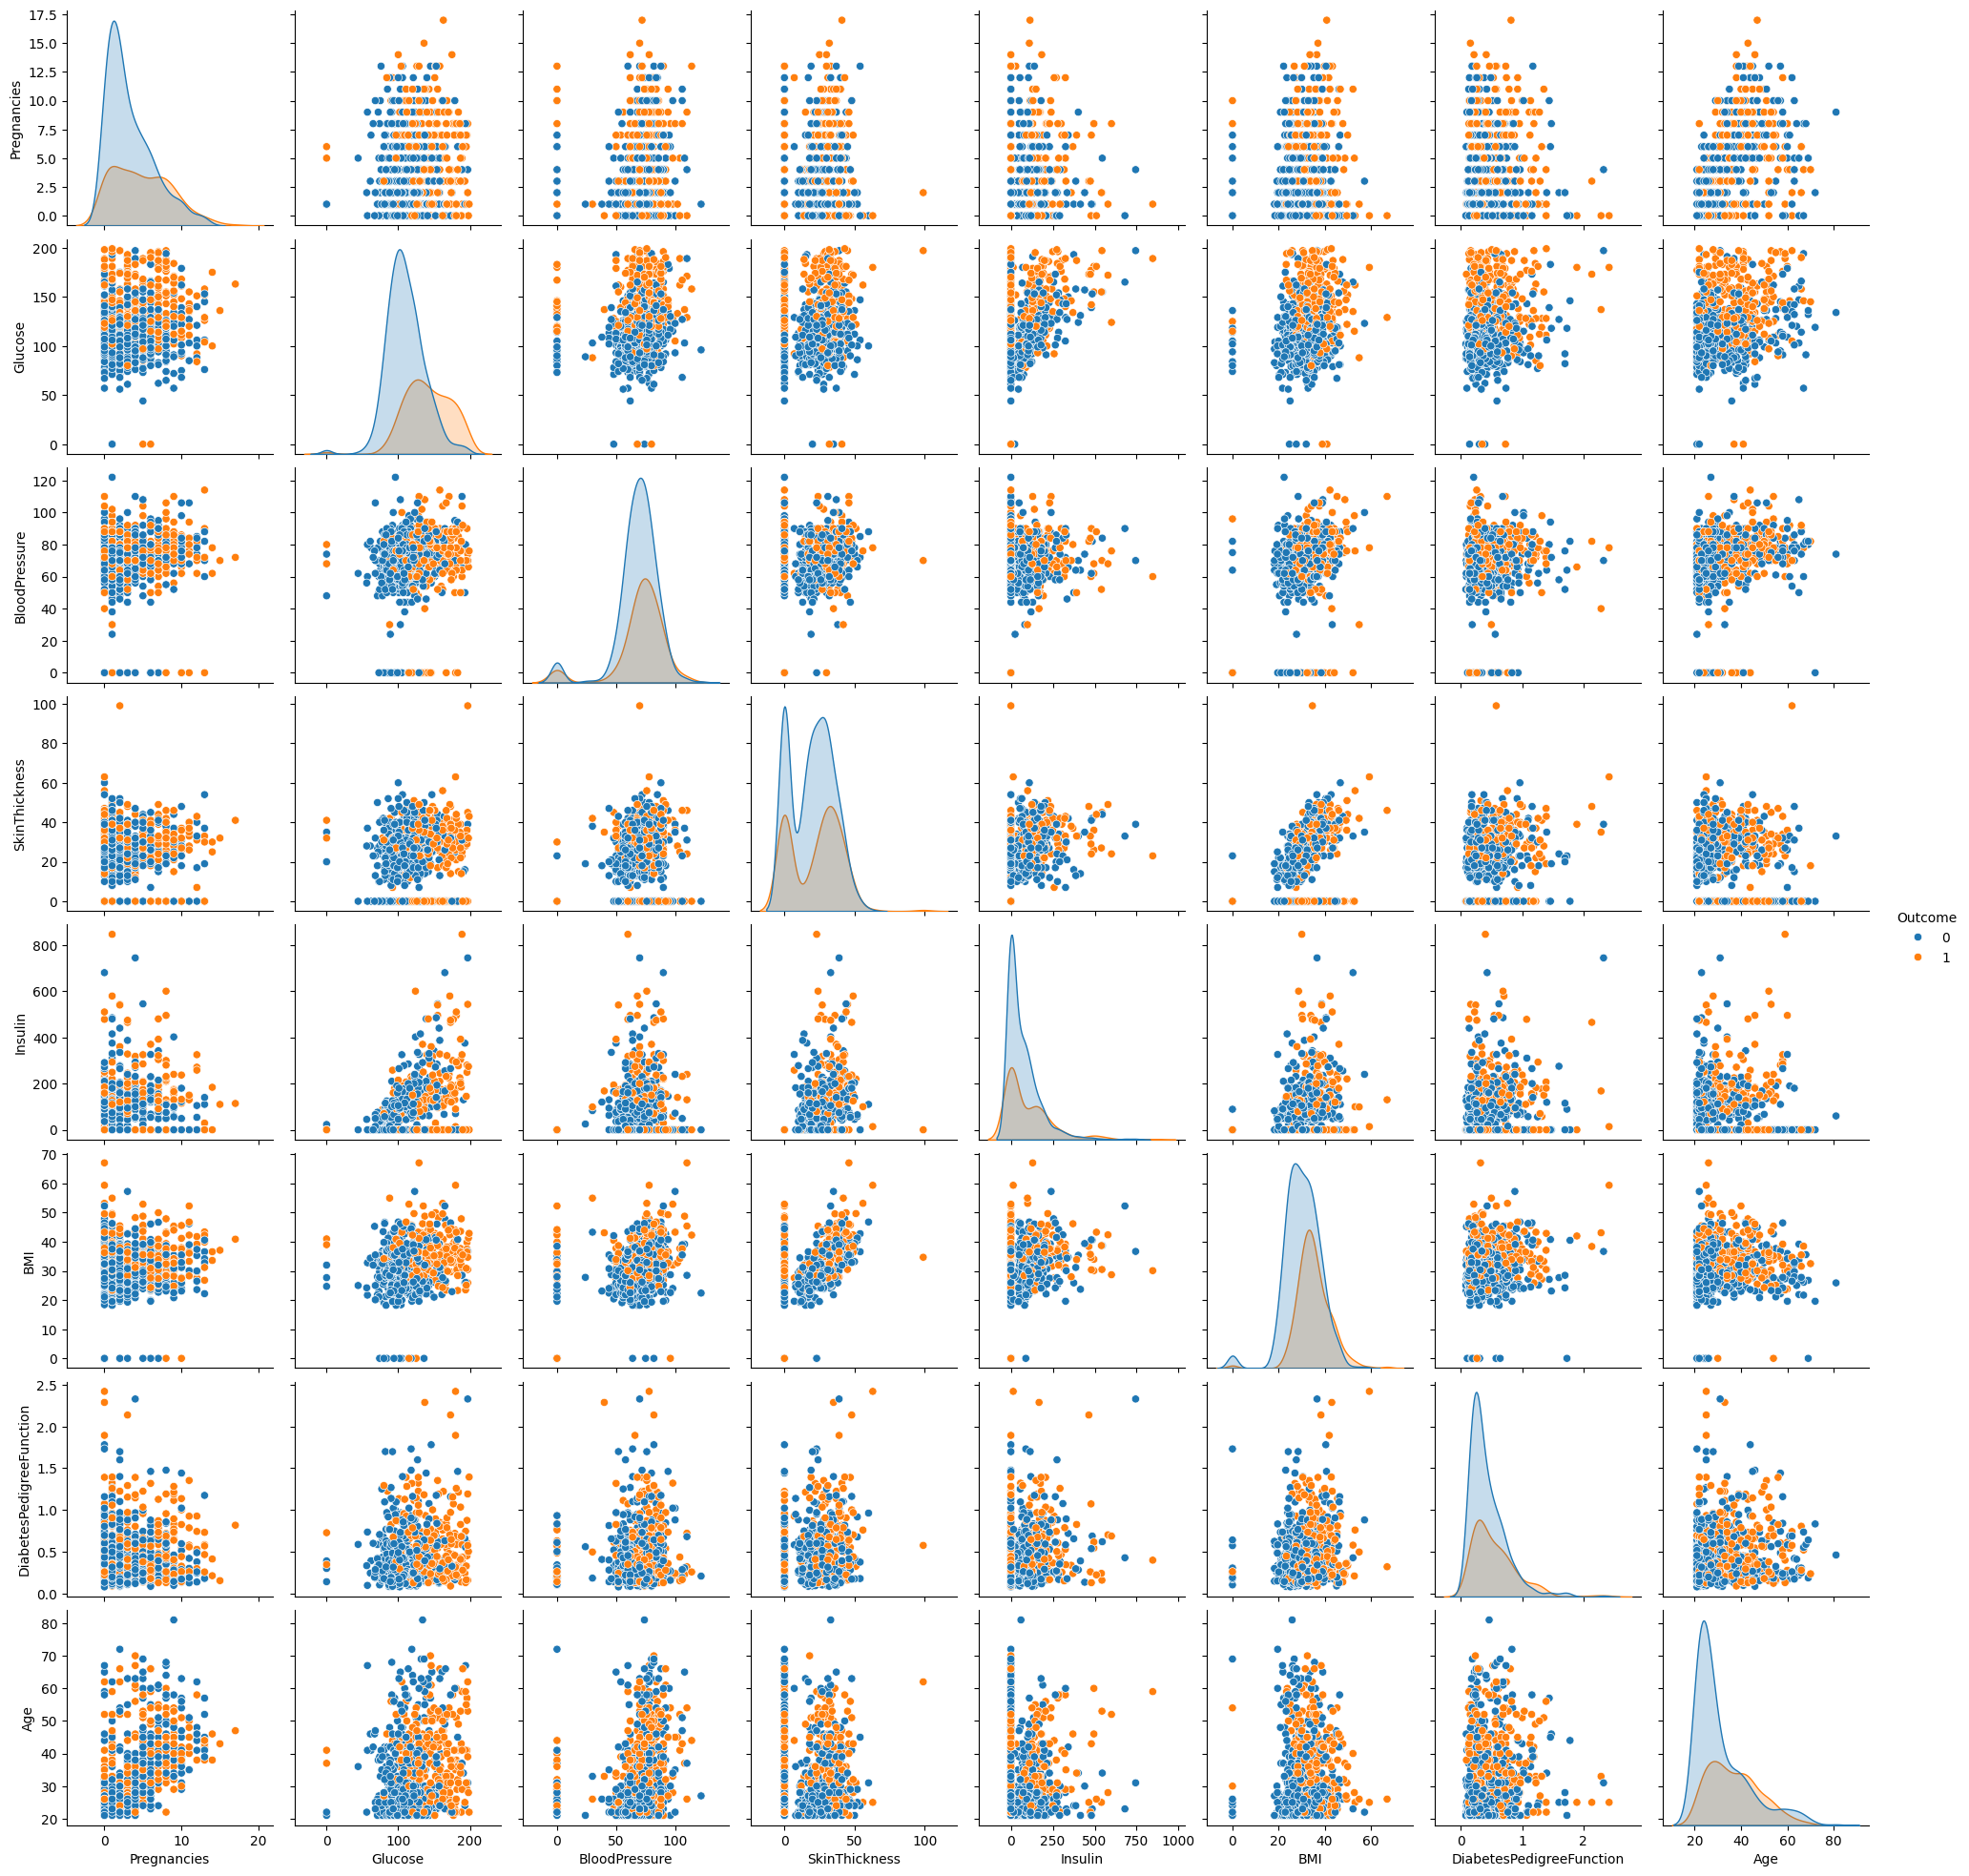

In [29]:
sns.pairplot(data = diabetes_dataset, hue='Outcome')
plt.show()

### Heatmap

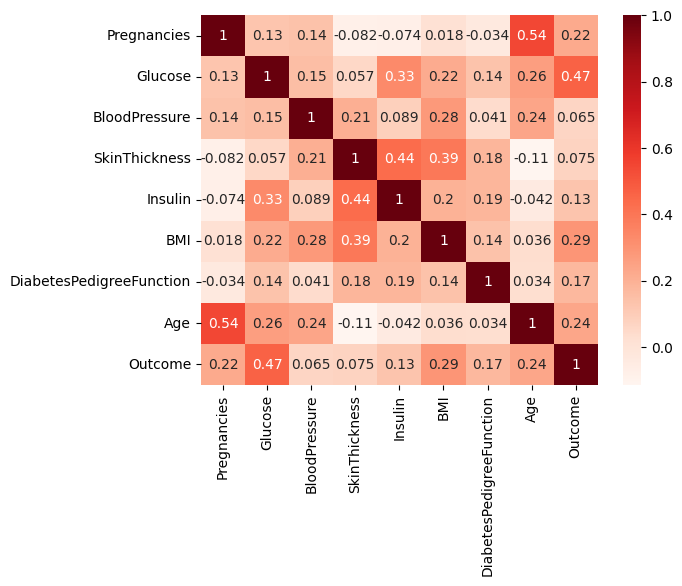

In [61]:
sns.heatmap(diabetes_dataset.corr(),cmap="Reds",annot=True)
plt.show()

# Data Preprocessing

In [32]:
# separating the data and the labels
X = diabetes_dataset.drop(columns='Outcome',axis=1)
Y = diabetes_dataset['Outcome']

In [33]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [34]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# Data Standardization

In [35]:
scaler = StandardScaler()

In [36]:
scaler.fit(X)

StandardScaler()

In [37]:
standardized_data = scaler.transform(X)

In [38]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [39]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [40]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# Train Test Split

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [42]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


In [43]:
print(Y.shape,Y_train.shape,Y_test.shape)

(768,) (614,) (154,)


Data Modelling

In [44]:
classifier = svm.SVC(kernel='linear')

In [45]:
# training the svm classifier
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

Model Evaluation

In [46]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [47]:
print('Accuracy score of the training data : ',training_data_accuracy)

Accuracy score of the training data :  0.7866449511400652


In [48]:
# accuracy score on the testing data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [49]:
print('Accuracy score of the testing data : ',test_data_accuracy)

Accuracy score of the testing data :  0.7727272727272727


Making a Predictive System


In [50]:
input_data = (4,110,92,0,0,37.6,0.191,30)
# changing input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)


In [51]:
# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [52]:
# standardize the input data
std_data = scaler.transform(input_data_reshaped)

C:\Users\ragha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [53]:
prediction = classifier.predict(std_data)
# print(prediction)
if(prediction[0]): print("The person is diabetic.")
else: print("The person is non-diabetic.")

The person is non-diabetic.
